# Online Payments Fraud Detection





## visualizing and analyzing the data

### activity1: Importing Libraries¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

### activity2:  Reading the csv data

In [2]:
# Reading the csv data
df = pd.read_csv(r'E:\\6th sem major project\\Final Project\\OnlineFraudData.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.drop(['isFlaggedFraud'],axis = 1, inplace = True)

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


### About Dataset

#### The below column reference:

##### 1.step: represents a unit of time where 1 step equals 1 hour

##### 2.type: type of online transaction

##### 3.amount: the amount of the transaction

##### 4.nameOrig: customer starting the transaction

##### 5.oldbalanceOrg: balance before the transaction

##### 6.newbalanceOrig: balance after the transaction

##### 7.nameDest: recipient of the transaction

##### 8.oldbalanceDest: initial balance of recipient before the transaction

##### 9.newbalanceDest: the new balance of recipient after the transaction

##### 10.isFraud: fraud transaction

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [9]:

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

## Checking for correlation¶

In [12]:
# checking for correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


## Heatmap

<Axes: >

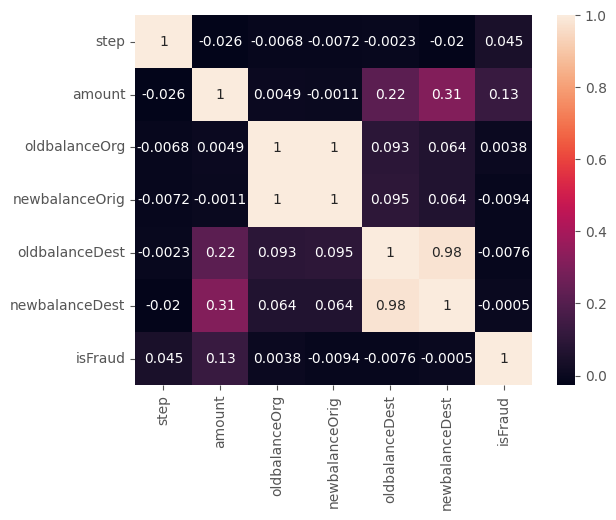

In [13]:
sns.heatmap(df.corr(),annot=True)

### activity3: Univariate analysis

<Axes: xlabel='step', ylabel='Count'>

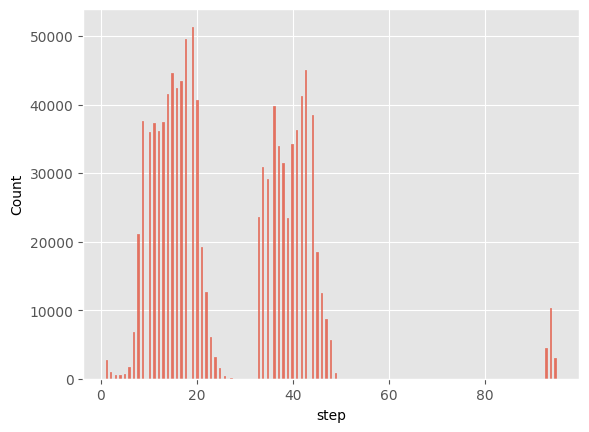

In [14]:
#step
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

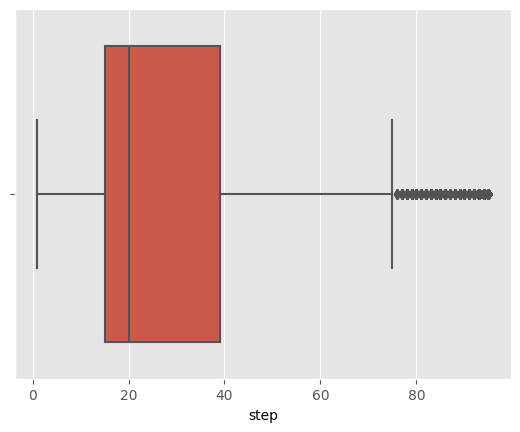

In [15]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

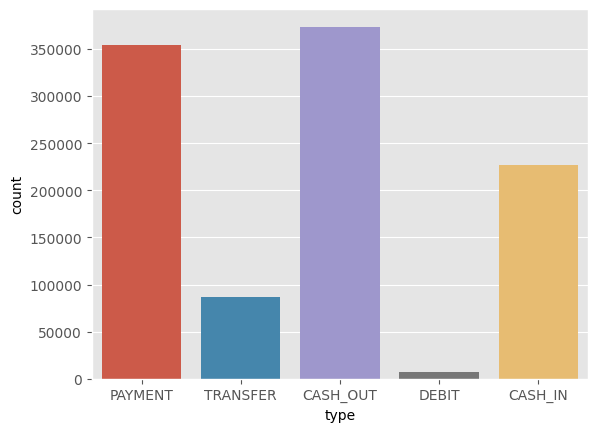

In [16]:
#type
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

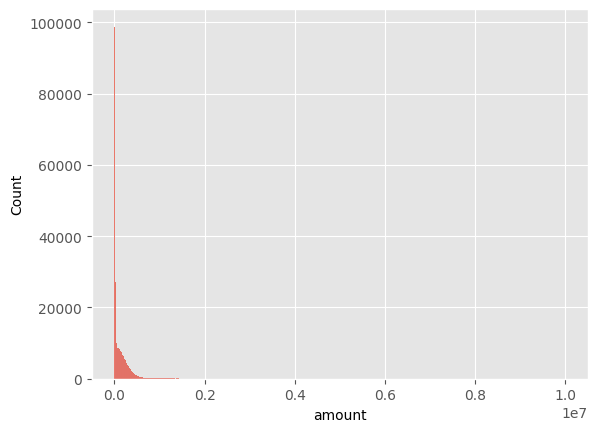

In [17]:
#amount
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

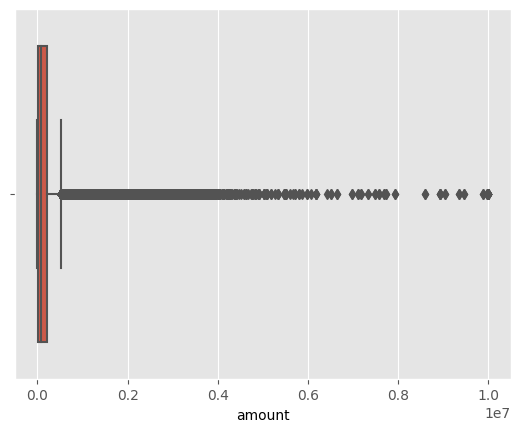

In [18]:
#amount
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

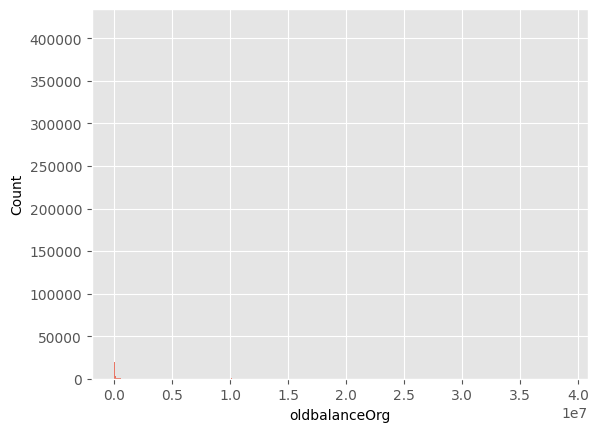

In [19]:
#oldbalanceOrg
sns.histplot(data=df,x='oldbalanceOrg')

In [20]:
#nameDest
df['nameDest'].value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: nameDest, Length: 449635, dtype: int64

<Axes: xlabel='oldbalanceDest'>

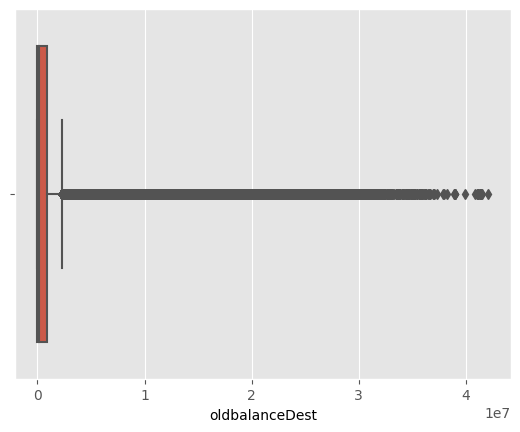

In [21]:
#oldbalanceDest
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

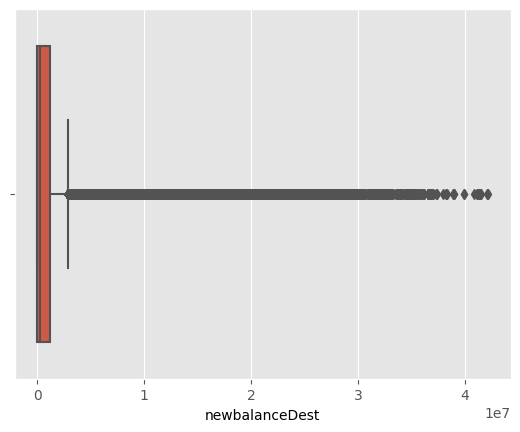

In [22]:
#newbalanceDest
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

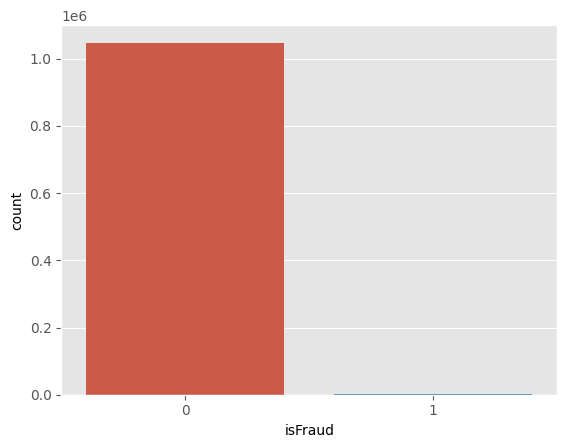

In [23]:
#isFraud:
sns.countplot(data=df,x='isFraud')

In [24]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [25]:
df.loc[df['isFraud']==0,'isFraud'] = 'is not Fraud'
df.loc[df['isFraud']==1,'isFraud'] = 'is Fraud'


In [26]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not Fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is Fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,is not Fraud
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,is not Fraud
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,is not Fraud
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,is not Fraud


### activity4: Bivariate analysis

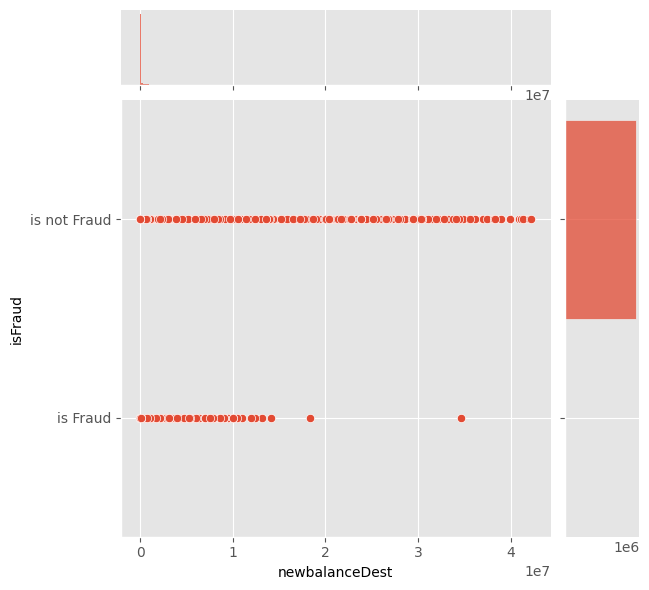

In [27]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

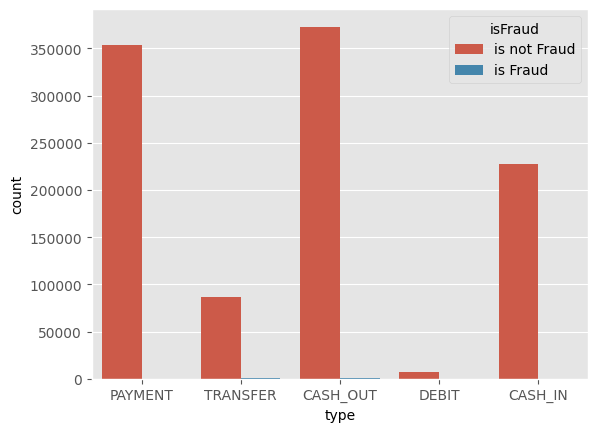

In [29]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

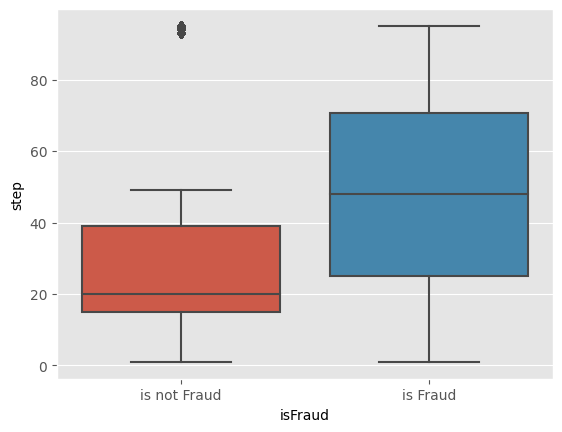

In [30]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

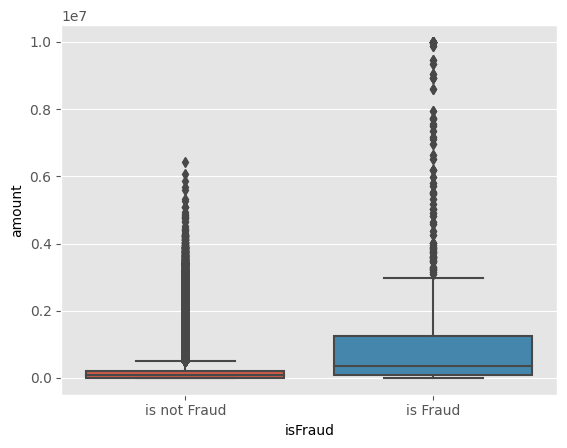

In [31]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

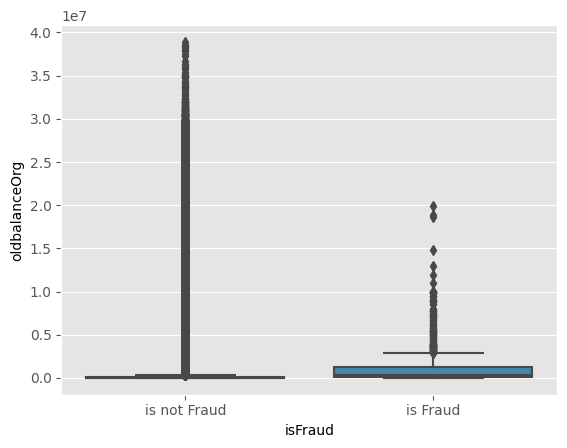

In [32]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

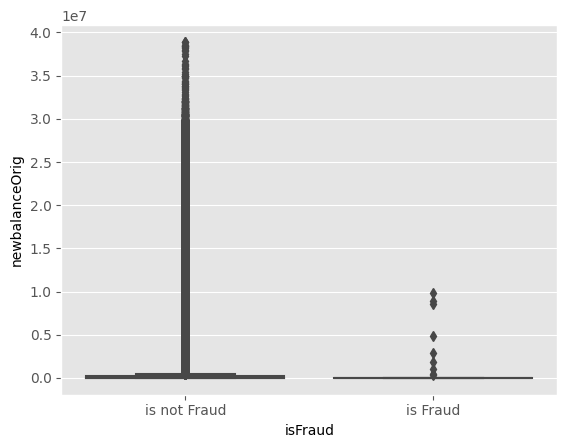

In [33]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

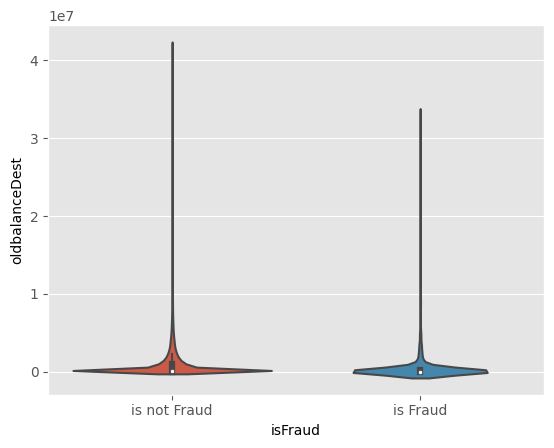

In [34]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

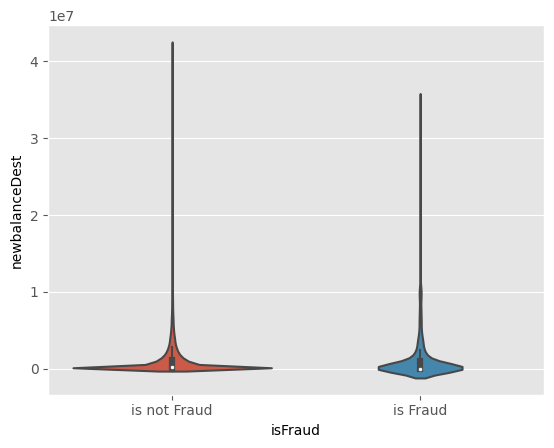

In [35]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

### activity5: Descriptive analysis


In [36]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1048575,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1048575
unique,NaN,5,NaN,1048317,NaN,NaN,449635,NaN,NaN,2
top,NaN,CASH_OUT,NaN,C1214450722,NaN,NaN,C985934102,NaN,NaN,is not Fraud
freq,NaN,373641,NaN,2,NaN,NaN,98,NaN,NaN,1047433
mean,2.696617e+01,NaN,1.586670e+05,NaN,8.740095e+05,8.938089e+05,NaN,9.781600e+05,1.114198e+06,NaN
std,1.562325e+01,NaN,2.649409e+05,NaN,2.971751e+06,3.008271e+06,NaN,2.296780e+06,2.416593e+06,NaN
min,1.000000e+00,NaN,1.000000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,1.500000e+01,NaN,1.214907e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,2.000000e+01,NaN,7.634333e+04,NaN,1.600200e+04,0.000000e+00,NaN,1.263772e+05,2.182604e+05,NaN
75%,3.900000e+01,NaN,2.137619e+05,NaN,1.366420e+05,1.746000e+05,NaN,9.159235e+05,1.149808e+06,NaN


## Data Preprocessing

In [37]:
# Shape of csv data
df.shape

(1048575, 10)

In [38]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [39]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,is not Fraud
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,is not Fraud
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,is Fraud
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,is Fraud
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,is not Fraud


### Activity 1: Checking for null values


In [40]:
# Finding null values
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
 7   isFraud         1048575 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 64.0+ MB


### Activity 2: Handling outliers


<Axes: >

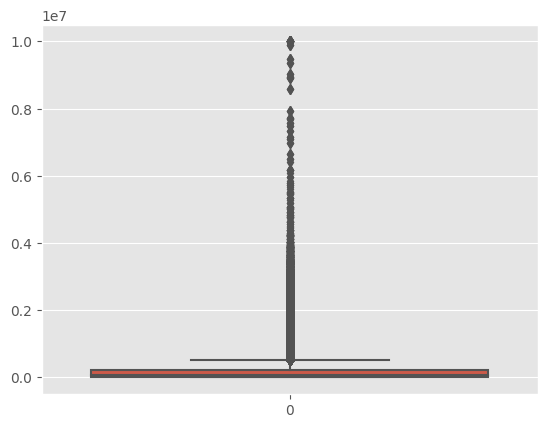

In [42]:
sns.boxplot(df['amount'])

## Remove the Outliers

In [43]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=array([10000000.]), count=array([14]))
158666.9755271392


In [44]:
q1 = np.quantile(df['amount'],0.25)
q3 = np.quantile(df['amount'],0.75)

IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

print('q1 :',q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper Bound :',upper_bound)
print('Lower Bound :',lower_bound)
print('Skewed data :',len(df[df['amount']>upper_bound]))
print('Skewed data :',len(df[df['amount']<lower_bound]))

q1 : 12149.065
q3 : 213761.89
IQR : 201612.825
Upper Bound : 516181.12750000006
Lower Bound : -290270.17250000004
Skewed data : 53088
Skewed data : 0


In [45]:
# To handle outliers transformation techniques are used.

def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=plt)

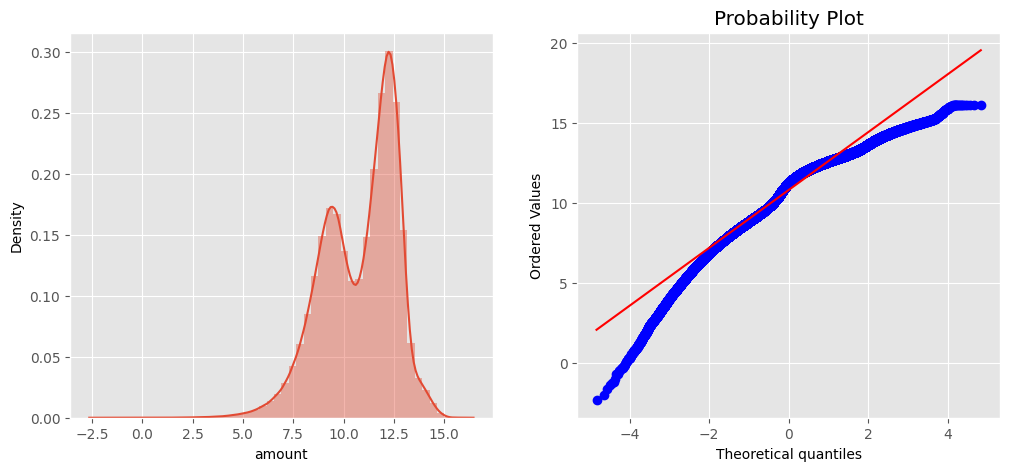

In [46]:
transformationPlot(np.log(df['amount']))

In [47]:
df['amount']=np.log(df['amount'])

### Activity 3: Object data labelencoding
 

In [48]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [49]:
df['type'].value_counts()

1    373641
3    353873
0    227130
4     86753
2      7178
Name: type, dtype: int64

## dividing the dataset into dependent and independent y and x respectively

In [50]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [51]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,4,5.198497,181.00,0.00,0.00,0.00
3,1,1,5.198497,181.00,0.00,21182.00,0.00
4,1,3,9.364617,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
1048570,95,1,11.794771,479803.00,347245.65,484329.37,616886.72
1048571,95,3,9.202042,90545.00,80627.64,0.00,0.00
1048572,95,3,9.556766,20545.00,6404.95,0.00,0.00
1048573,95,3,9.212343,90605.00,80584.95,0.00,0.00


In [52]:
y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
1048570    is not Fraud
1048571    is not Fraud
1048572    is not Fraud
1048573    is not Fraud
1048574    is not Fraud
Name: isFraud, Length: 1048575, dtype: object

### Activity 4: Splitting data into train and test
 

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(838860, 7)
(209715, 7)
(209715,)
(838860,)


## Model Building

### activity1.Random Forest classifier¶

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1=rfc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict1)
test_accuracy

0.9997520444412655

In [56]:
y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy


1.0

In [57]:
pd.crosstab(y_test,y_test_predict1)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,175,46
is not Fraud,6,209488


In [58]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

    is Fraud       0.97      0.79      0.87       221
is not Fraud       1.00      1.00      1.00    209494

    accuracy                           1.00    209715
   macro avg       0.98      0.90      0.94    209715
weighted avg       1.00      1.00      1.00    209715



### activity2.Decision tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_test_predict2=dtc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy


0.9995899196528623

In [60]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy


1.0

In [61]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,185,36
is not Fraud,50,209444


In [62]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.79      0.84      0.81       221
is not Fraud       1.00      1.00      1.00    209494

    accuracy                           1.00    209715
   macro avg       0.89      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715



### activity3.ExtraTrees Classifier

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)

y_test_predict3=etc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy


0.999747276065136

In [64]:
y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy


1.0

In [65]:
pd.crosstab(y_test,y_test_predict3)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,169,52
is not Fraud,1,209493


In [66]:
print(classification_report(y_test,y_test_predict3))

              precision    recall  f1-score   support

    is Fraud       0.99      0.76      0.86       221
is not Fraud       1.00      1.00      1.00    209494

    accuracy                           1.00    209715
   macro avg       1.00      0.88      0.93    209715
weighted avg       1.00      1.00      1.00    209715



### activity4. SupportVectorMachine Classifier

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train,y_train)
y_test_predict4=svc.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9991750709295949

In [68]:
y_train_predict4=svc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9991166583220085

In [69]:
pd.crosstab(y_test,y_test_predict4)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,49,172
is not Fraud,1,209493


In [70]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

    is Fraud       0.98      0.22      0.36       221
is not Fraud       1.00      1.00      1.00    209494

    accuracy                           1.00    209715
   macro avg       0.99      0.61      0.68    209715
weighted avg       1.00      1.00      1.00    209715



In [74]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [71]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
y_train1 = la.fit_transform(y_train)

In [72]:
y_test1=la.transform(y_test)

In [73]:
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

### activity5.xgboost Classifier

In [75]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train1)

y_test_predict5=xgb1.predict(x_test)
test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy


0.9998188017070787

In [76]:
y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy


0.9999606608969316

In [77]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,186,35
1,3,209491


In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       221
           1       1.00      1.00      1.00    209494

    accuracy                           1.00    209715
   macro avg       0.99      0.92      0.95    209715
weighted avg       1.00      1.00      1.00    209715



### Compare Models

In [79]:
def compareModel():
    print("train accuracy for rfc",accuracy_score(y_train_predict1,y_train))
    print("test accuracy for rfc",accuracy_score(y_test_predict1,y_test))
    print("train accuracy for dtc",accuracy_score(y_train_predict2,y_train))
    print("test accuracy for dtc",accuracy_score(y_test_predict2,y_test))
    print("train accuracy for etc",accuracy_score(y_train_predict3,y_train))
    print("test accuracy for etc",accuracy_score(y_test_predict3,y_test))
    print("train accuracy for svc",accuracy_score(y_train_predict4,y_train))
    print("test accuracy for svcc",accuracy_score(y_test_predict4,y_test))
    print("train accuracy for xgb1",accuracy_score(y_train_predict5,y_train1))
    print("test accuracy for xgb1",accuracy_score(y_test_predict5,y_test1))

In [80]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9997520444412655
train accuracy for dtc 1.0
test accuracy for dtc 0.9995899196528623
train accuracy for etc 1.0
test accuracy for etc 0.999747276065136
train accuracy for svc 0.9991166583220085
test accuracy for svcc 0.9991750709295949
train accuracy for xgb1 0.9999606608969316
test accuracy for xgb1 0.9998188017070787


In [81]:
import pickle
pickle.dump(svc,open('payments.pkl','wb'))

In [83]:
pwd

'd:\\'

In [84]:
df.head(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9.194174,170136.00,160296.36,0.0,0.00,is not Fraud
1,1,3,7.530630,21249.00,19384.72,0.0,0.00,is not Fraud
2,1,4,5.198497,181.00,0.00,0.0,0.00,is Fraud
3,1,1,5.198497,181.00,0.00,21182.0,0.00,is Fraud
4,1,3,9.364617,41554.00,29885.86,0.0,0.00,is not Fraud
5,1,3,8.964147,53860.00,46042.29,0.0,0.00,is not Fraud
6,1,3,8.868944,183195.00,176087.23,0.0,0.00,is not Fraud
7,1,3,8.969751,176087.23,168225.59,0.0,0.00,is not Fraud
8,1,3,8.300121,2671.00,0.00,0.0,0.00,is not Fraud
9,1,2,8.582563,41720.00,36382.23,41898.0,40348.79,is not Fraud


In [85]:
df.tail(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1048555,95,3,9.386033,20304.00,8383.28,0.00,0.00,is not Fraud
1048556,95,3,8.785393,29467.00,22928.96,0.00,0.00,is not Fraud
1048557,95,3,10.164461,51929.00,25965.13,0.00,0.00,is not Fraud
1048558,95,1,10.186235,104187.00,77651.59,205460.26,231995.66,is not Fraud
1048559,95,3,8.985558,44696.00,36709.10,0.00,0.00,is not Fraud
1048560,95,0,11.638787,41533.00,154945.53,565908.33,452495.80,is not Fraud
1048561,95,2,8.972195,31489.00,23608.12,18700000.00,18700000.00,is not Fraud
1048562,95,0,10.535940,102.00,37746.42,21209.96,0.00,is not Fraud
1048563,95,3,9.150033,20216.00,10801.25,0.00,0.00,is not Fraud
1048564,95,3,8.561687,21184.00,15956.51,0.00,0.00,is not Fraud


In [86]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[1,3,9.194174,170136.00,160296.36,0.0,0.00]])
print(svc.predict(features))

['is not Fraud']


In [87]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[94,4,14.590090,2169679.91,0.0,0.00,0.00]])
print(svc.predict(features))

['is Fraud']


In [88]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[1,2,9.138070,11299.00,1996.21,29832.0,16896.70]])
print(svc.predict(features))

['is not Fraud']


In [89]:
# prediction
#features = [step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest]
features = np.array([[94,1,14.190236,1454592.61,0.0,264042.92,1718635.53]])
print(svc.predict(features))

['is not Fraud']
